# 3 classes in this yolo


1.   person
2.   mask
3.   noMask



In [ ]:
# making all the necessary imports here
import cv2
import matplotlib.pyplot as plt
# you may include more libraries here if needed
!nvidia-smi

Tue Nov 16 18:07:02 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8    32W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#### Getting YOLO Ready
You do not have to do anything here

In [ ]:
!git clone https://github.com/pjreddie/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 5940, done.
remote: Total 5940 (delta 0), reused 0 (delta 0), pack-reused 5940
Receiving objects: 100% (5940/5940), 6.37 MiB | 16.13 MiB/s, done.
Resolving deltas: 100% (3925/3925), done.


### changed MakeFile:  
by uncommenting line 14 and changing 52 to 35 like:  
ARCH= -gencode arch=compute_35,code=compute_35

In [ ]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile
!make

/content/darknet
mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DOPENCV -DGPU -c ./src/gemm.c -o obj/gemm.o
./src/gemm.c: In function ‘time_gpu’:
./src/gemm.c:232:9: warning: ‘cudaThreadSynchronize’ is deprecated [-Wdeprecated-declarations]
         cudaThreadSynchronize();
         ^~~~~~~~~~~~~~~~~~~~~
In file included from /usr/local/cuda/include/cuda_runtime.h:96:0,
                 from include/darknet.h:11,
                 from ./src/utils.h:5,
                 from ./src/gemm.c:2:
/usr/local/cuda/include/cuda_runtime_api.h:1004:57: note: declared here
 extern __CUDA_DEPRECATED __host__ cudaError_t CUDARTAPI cudaThreadSynchronize(void);
                                                         ^~~~~~~~~~~~~~~~~~~~~
gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -Wall -

In [ ]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2021-11-16 18:08:21--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  23.0MB/s    in 7.5s    

2021-11-16 18:08:29 (20.7 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
# !unzip /content/Dataset.zip -d /content/darknet/

In [ ]:
import shutil
shutil.rmtree('/content/darknet/data/labels')

#### Editing Config Files Here

You will have to refer to the medium article shared initially to be able to do this part 

<b>Note:</b>The line numbers in the artcile are not the same but are in the same order

In [ ]:
%%writefile cfg/mask-yolov3.cfg

### Edit Here ### 

[net]
# Testing
batch=24
subdivisions=8
# Training
# batch=64
# subdivisions=2
width=416
height=416
channels=3
momentum=0.9
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1

learning_rate=0.001
burn_in=1000
max_batches = 500200
policy=steps
steps=400000,450000
scales=.1,.1

[convolutional]
batch_normalize=1
filters=16
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=256
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=512
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=1

[convolutional]
batch_normalize=1
filters=1024
size=3
stride=1
pad=1
activation=leaky

###########

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=512
size=3
stride=1
pad=1
activation=leaky

[convolutional]
size=1
stride=1
pad=1
filters=24
activation=linear

[yolo]
mask = 3,4,5
anchors = 10,14,  23,27,  37,58,  81,82,  135,169,  344,319
classes=3
num=6
jitter=.3
ignore_thresh = .7
truth_thresh = 1
random=1

[route]
layers = -4

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=leaky

[upsample]
stride=2

[route]
layers = -1, 8

[convolutional]
batch_normalize=1
filters=256
size=3
stride=1
pad=1
activation=leaky

[convolutional]
size=1
stride=1
pad=1
filters=24
activation=linear

[yolo]
mask = 0,1,2
anchors = 10,14,  23,27,  37,58,  81,82,  135,169,  344,319
classes= 3
num=6
jitter=.3
ignore_thresh = .7
truth_thresh = 1
random=1

#################

Writing cfg/mask-yolov3.cfg


In [ ]:
%%writefile cfg/mask-obj.data

### Edit Here ###

classes= 3
train  = ./train.txt 
valid  = ./test.txt  

#################

names = cfg/mask-obj.names  
backup = backup/

Writing cfg/mask-obj.data


In [ ]:
%%writefile cfg/mask-obj.names

### Edit Here ###
person
mask
noMask
#################

Writing cfg/mask-obj.names


In [ ]:
# %ls /content/darknet

In [ ]:
# !apt-get install dos2unix

In [ ]:
# should we run this??? 
# !dos2unix /content/darknet/mask-no_mask-test.txt
# !dos2unix /content/darknet/mask-no_mask-train.txt
# !dos2unix /content/darknet/D/labels/*
# !dos2unix /content/darknet/*

In [ ]:
!./darknet detector train cfg/mask-obj.data cfg/mask-yolov3.cfg /content/darknet/darknet53.conv.74

Streaming output truncated to the last 5000 lines.
Region 23 Avg IOU: 0.481814, Class: 0.499681, Obj: 0.319050, No Obj: 0.319081, .5R: 0.400000, .75R: 0.000000,  count: 5
Region 16 Avg IOU: 0.752596, Class: 0.500632, Obj: 0.447018, No Obj: 0.446447, .5R: 1.000000, .75R: 0.333333,  count: 3
Region 23 Avg IOU: 0.358366, Class: 0.499979, Obj: 0.319063, No Obj: 0.319081, .5R: 0.200000, .75R: 0.000000,  count: 5
Region 16 Avg IOU: 0.464329, Class: 0.499284, Obj: 0.447018, No Obj: 0.446447, .5R: 0.000000, .75R: 0.000000,  count: 2
Region 23 Avg IOU: 0.454087, Class: 0.499862, Obj: 0.319056, No Obj: 0.319080, .5R: 0.300000, .75R: 0.000000,  count: 10
Region 16 Avg IOU: 0.442124, Class: 0.499610, Obj: 0.446730, No Obj: 0.446447, .5R: 0.000000, .75R: 0.000000,  count: 4
Region 23 Avg IOU: 0.498075, Class: 0.500015, Obj: 0.319073, No Obj: 0.319082, .5R: 0.714286, .75R: 0.000000,  count: 7
Region 16 Avg IOU: 0.597126, Class: 0.499815, Obj: 0.446788, No Obj: 0.446447, .5R: 0.800000, .75R: 0.000000

In [ ]:
!pwd

/content/darknet


/content/darknet/Dataset/labels

#### Testing Some Images

You will make use of "darknet detector test" for this purpose. The first line of the next cell (the statement in the comment) is provided to you as a sample. You will have to edit it to add your weight's file and some image name. You can also tweak the threshold value

layer     filters    size              input                output
    0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16  0.150 BFLOPs
    1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16
    2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32  0.399 BFLOPs
    3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32
    4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64  0.399 BFLOPs
    5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64
    6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128  0.399 BFLOPs
    7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128
    8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256  0.399 BFLOPs
    9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256
   10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512  0.399 BFLOPs
   11 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 512
   12 con

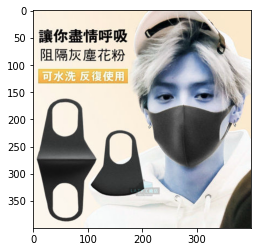

In [ ]:
!./darknet detector test cfg/mask-obj.data cfg/mask-yolov3.cfg backup/mask-yolov3_500.weights /content/darknet/Dataset/Images/maksssksksss171.png -thresh 0.1

### Edit Here ###

# add edited statement here
image = cv2.imread("predictions.jpg")
plt.imshow(image)

#################